<a target="_blank" href="https://colab.research.google.com/github/toelt-llc/HSLU-WSCS_2025/blob/master/02%20-%20Easy_Network_with_Keras.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Project - First Fully connected network with Keras

Author: Umberto Michelucci (umberto.michelucci@toelt.ai)

## Exercises

### Exercise 1:
Try to increase the network size (increasing the number of layers and number of neurons) and see if you get better results.

### Exercise 2:
Try to reduce the network size to just one neuron. What kind of neuron do you need to use (activation function, output, etc.) to classify the images? And what results do you get?

### Exercise 3:
Check for overfitting. Is the network overfitting? Can you tell?

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

import matplotlib.pyplot as plt

2025-03-26 09:03:59.723634: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'Label is 9')

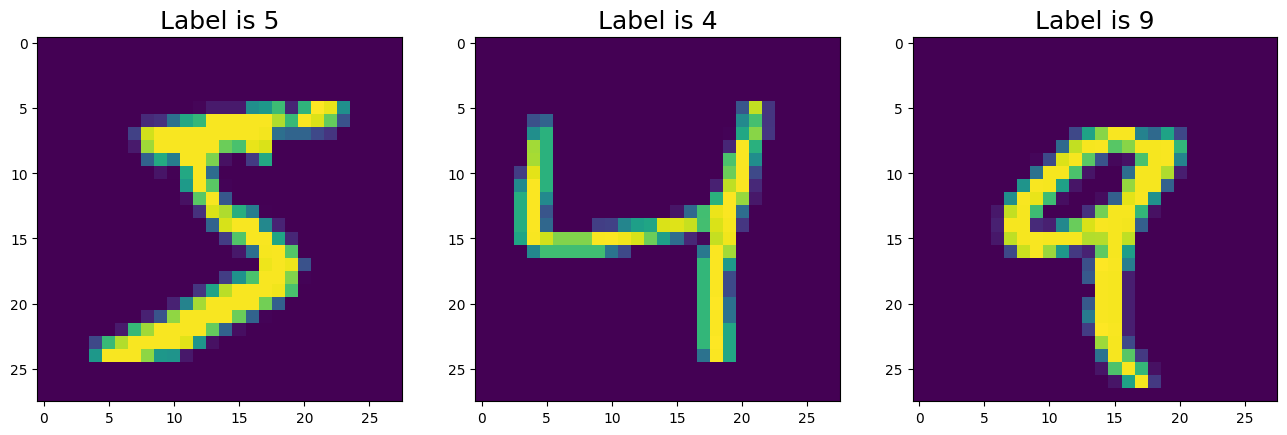

In [4]:
fig = plt.figure(figsize = (16,5))
fig.add_subplot(1,3,1)
plt.imshow(x_train[0])
plt.title("Label is "+ str(y_train[0]), fontsize = 18)
fig.add_subplot(1,3,2)
plt.imshow(x_train[2])
plt.title("Label is "+ str(y_train[2]), fontsize = 18)
fig.add_subplot(1,3,3)
plt.imshow(x_train[4])
plt.title("Label is "+ str(y_train[4]), fontsize = 18)

## Sequential model

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/Users/arnaud/miniconda3/envs/wscs/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8600 - loss: 0.4853 - val_accuracy: 0.9560 - val_loss: 0.1422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9548 - loss: 0.1535 - val_accuracy: 0.9695 - val_loss: 0.1044
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1072 - val_accuracy: 0.9752 - val_loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9745 - loss: 0.0857 - val_accuracy: 0.9761 - val_loss: 0.0807
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9763 - loss: 0.0753 - val_accuracy: 0.9764 - val_loss: 0.0827
313/313 - 0s - 2ms/step - accuracy: 0.9764 - loss: 0.0827


[0.08273772895336151, 0.9764000177383423]

In [7]:
print(history.history)

{'accuracy': [0.9129666686058044, 0.956766664981842, 0.967033326625824, 0.9728000164031982, 0.9763333201408386], 'loss': [0.2982998192310333, 0.14598549902439117, 0.10770720988512039, 0.08862010389566422, 0.07594448328018188], 'val_accuracy': [0.9559999704360962, 0.9695000052452087, 0.9751999974250793, 0.9761000275611877, 0.9764000177383423], 'val_loss': [0.14224016666412354, 0.10441672056913376, 0.0864076092839241, 0.08071688562631607, 0.08273772895336151]}


Let's check how the network is learning by plotting the loss function for the training and test datasets. This is a handy way to check if there is any overfitting or if the network is not learning properly.

### Learning Assessment

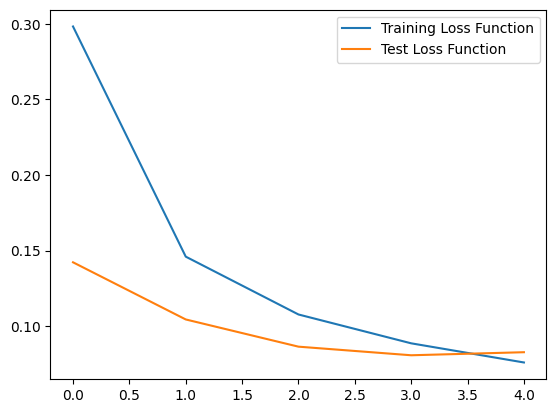

In [8]:
plt.plot(history.history['loss'], label = 'Training Loss Function')
plt.plot(history.history['val_loss'], label = 'Test Loss Function')
plt.legend()
plt.show()

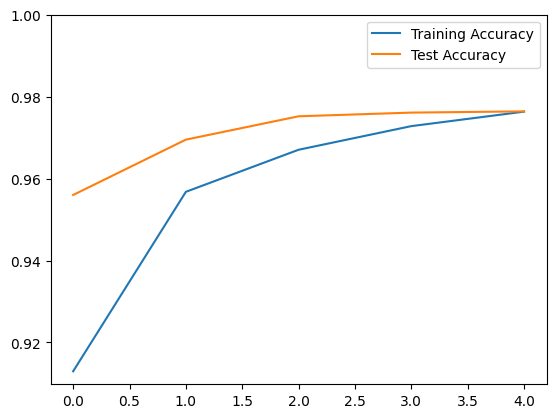

In [9]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.ylim(None, 1)
plt.legend()
plt.show()

### Prediction check

In [10]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([6.4494625e-11, 1.7444380e-12, 4.3463353e-09, 2.4386212e-02,
       1.0050960e-19, 9.7561365e-01, 6.1678792e-15, 8.9182317e-10,
       1.4149109e-12, 1.5917372e-07], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


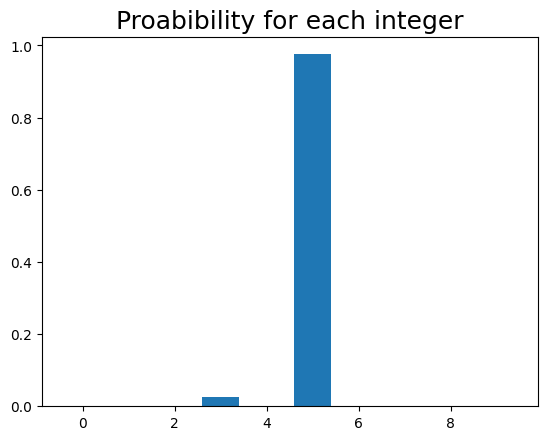

In [11]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

## Functional APIs

Networks can be built with the Sequential approach by using the ```Sequential()``` constructor, or by using functional API, as shown below. The functional API will give much more flexibility to build more flexible network architectures.

In [12]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8623 - loss: 0.4769 - val_accuracy: 0.9598 - val_loss: 0.1349
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9562 - loss: 0.1474 - val_accuracy: 0.9694 - val_loss: 0.0988
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9680 - loss: 0.1073 - val_accuracy: 0.9747 - val_loss: 0.0817
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9743 - loss: 0.0847 - val_accuracy: 0.9770 - val_loss: 0.0770
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0727 - val_accuracy: 0.9773 - val_loss: 0.0746
313/313 - 1s - 2ms/step - accuracy: 0.9773 - loss: 0.0746


[0.07463468611240387, 0.9772999882698059]

In [15]:
model.predict(x_train[0][np.newaxis,:])[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([2.2599813e-12, 6.0837230e-10, 1.7392597e-10, 1.5854185e-04,
       1.5025365e-17, 9.9984145e-01, 2.5259745e-13, 1.7514104e-10,
       9.1173718e-12, 3.8030410e-09], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


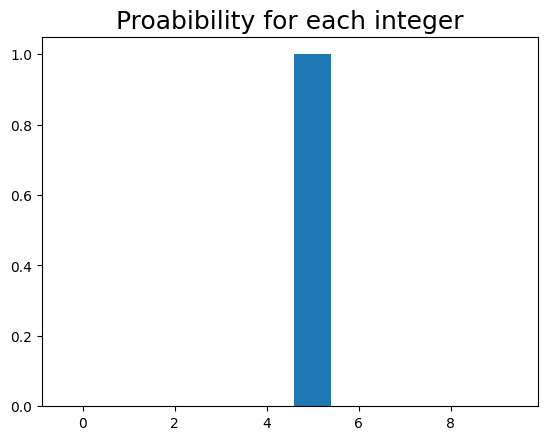

In [16]:
plt.bar(np.arange(0,10,1), model.predict(x_train[0][np.newaxis,:])[0])
plt.title ("Proabibility for each integer", fontsize = 18)
plt.show()

In [17]:
print(y_train[0])

5


## Custom Training Loop - Advanced (can be skipped)

In [18]:
input = tf.keras.layers.Input(shape = (28,28), name = 'Input_Layer')
layer = tf.keras.layers.Flatten()(input)
layer = tf.keras.layers.Dense(128, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.2)(layer)
layer = tf.keras.layers.Dense(10, activation='softmax')(layer)

model = tf.keras.models.Model(inputs=input, outputs=layer)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
batch_size = 32

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_dataset = val_dataset.batch(batch_size)

In [20]:
epochs = 5
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0


/Users/arnaud/miniconda3/envs/wscs/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Training loss (for one batch) at step 0: 2.4055
Seen so far: 32 samples
Training loss (for one batch) at step 200: 2.1648
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 2.0803
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.8790
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 1.8391
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.7427
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 1.5016
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.3292
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 1.3511
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 1.3547
Seen so far: 57632 samples


2025-03-26 09:05:59.421130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 1
Training loss (for one batch) at step 0: 1.3762
Seen so far: 32 samples
Training loss (for one batch) at step 200: 1.2035
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 1.0847
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 1.1840
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.9307
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 1.0780
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.8361
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 1.1253
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.9788
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.7251
Seen so far: 57632 samples


2025-03-26 09:06:39.986523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 2
Training loss (for one batch) at step 0: 0.7863
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.8083
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.7662
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.8410
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.6765
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.8775
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.7502
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.6803
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.6733
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.7120
Seen so far: 57632 samples


2025-03-26 09:07:21.452964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 3
Training loss (for one batch) at step 0: 0.6710
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.6233
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.9062
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.8108
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.5679
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.7734
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.3917
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.8047
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.7717
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.4551
Seen so far: 57632 samples


2025-03-26 09:08:05.957733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Start of epoch 4
Training loss (for one batch) at step 0: 0.6188
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.5431
Seen so far: 6432 samples
Training loss (for one batch) at step 400: 0.4361
Seen so far: 12832 samples
Training loss (for one batch) at step 600: 0.5933
Seen so far: 19232 samples
Training loss (for one batch) at step 800: 0.5619
Seen so far: 25632 samples
Training loss (for one batch) at step 1000: 0.6216
Seen so far: 32032 samples
Training loss (for one batch) at step 1200: 0.4166
Seen so far: 38432 samples
Training loss (for one batch) at step 1400: 0.7866
Seen so far: 44832 samples
Training loss (for one batch) at step 1600: 0.3825
Seen so far: 51232 samples
Training loss (for one batch) at step 1800: 0.3841
Seen so far: 57632 samples


2025-03-26 09:08:45.745380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.5324


[0.4719829559326172, 0.8815000057220459]